Saving download (1).jpeg to download (1) (1).jpeg
Saving test.jpg to test (1).jpg


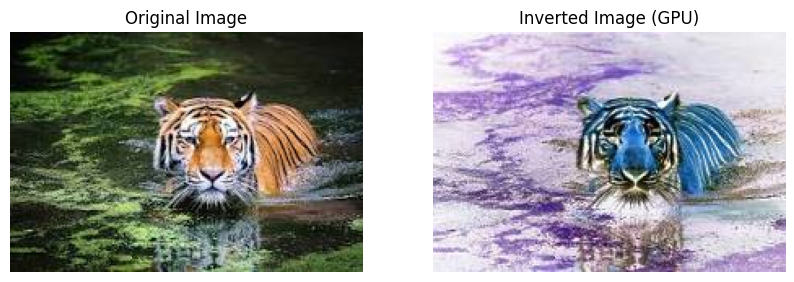

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# GPU Image Color Inversion using CuPy and OpenCV
!pip install opencv-python-headless cupy-cuda12x --quiet

import cv2
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload an image
uploaded = files.upload()
filename = next(iter(uploaded))

# Load uploaded image
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Transfer to GPU and invert
image_gpu = cp.asarray(image)
inverted_gpu = 255 - image_gpu
inverted = cp.asnumpy(inverted_gpu)  # Transfer back to CPU

# Show original and inverted images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Inverted Image (GPU)")
plt.imshow(inverted)
plt.axis("off")
plt.show()

# Save and download the output image
inverted_bgr = cv2.cvtColor(inverted, cv2.COLOR_RGB2BGR)
cv2.imwrite("inverted_output.jpg", inverted_bgr)
files.download("inverted_output.jpg")
